# 데이터프레임 병합하기, 다듬기
## 함수들을 불러와서 사용하는법
### concat
- concat([DataFrame1, DataFrame2])
- concatenate : 사슬같이 잇다. 연결하다.

### merge
- merge(DaraFrame1, DataFrame2)
- merge : 병합하다.


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3']
                   }, index = [0,1,2,3])
 
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7']},
                  index= [4,5,6,7])
 
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11']},
                  index= [8,9,10,11])

### concat
- concat([DataFrame1, DataFrame2])
- concatenate : 사슬같이 잇다. 연결하다.
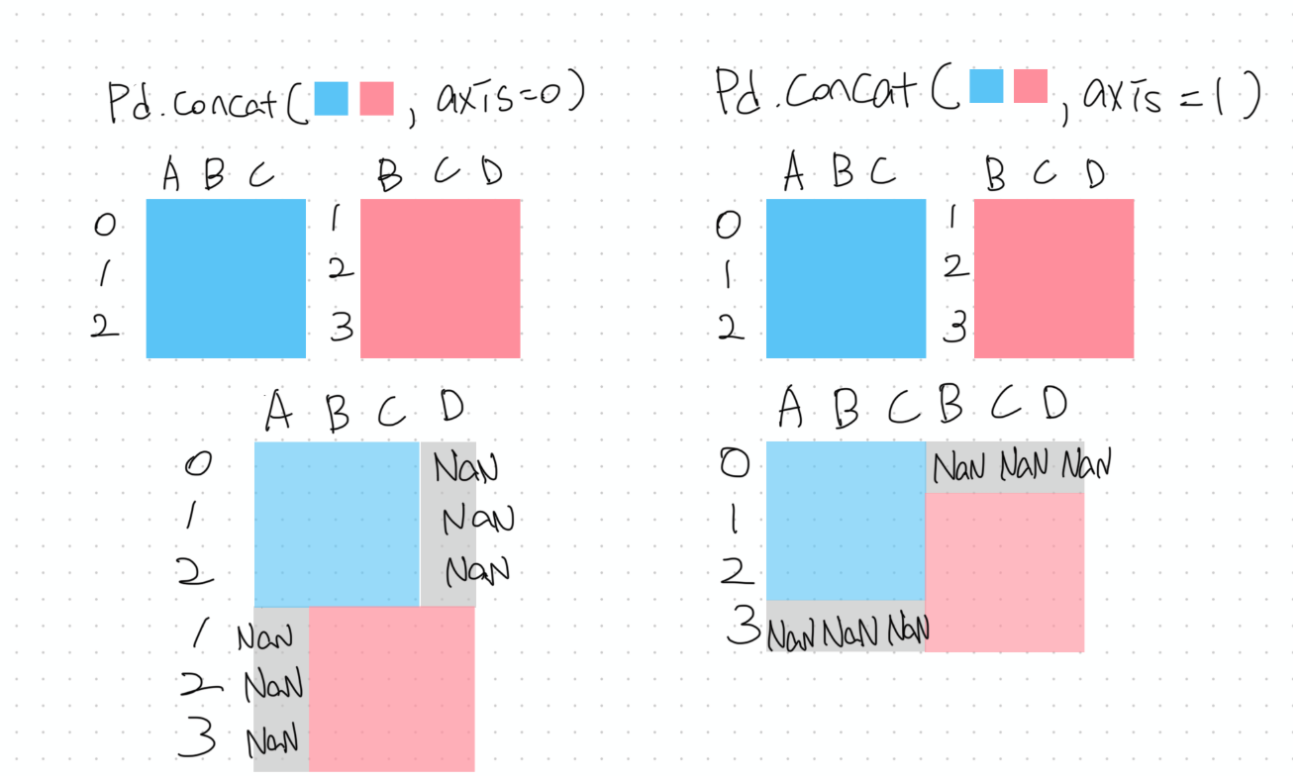
- 여러개의 df을 병합할 수 있다.
- 축설정에 따라 데이터를 병합하는 기준이 달라진다
    - axis = 0 : 행을 기준으로 병합(위에서 아래로 병합)
    - axis = 1 : 열을 기준으로 병합(왼쪽에서 오른쪽으로 병합)
- 인덱스번호는 유지, 재설정시 ignore_index = True 설정해야한다.

In [ ]:
# concat을 활용해서 DF 합치기 => row가 늘어나는 형태.
pd.concat([df1, df2, df3])

# 다중 인덱스 부여하기(계층적으로 데이터 관리할 수 있다.)
# 계층별로 관리하고싶다면 keys = ["x", "y", "z"] 형태로 지정해주면 된다.
pd.concat([df1, df2, df3], keys=["x", "y", "z"])

In [ ]:
# 새로운 data 추가해서 column이 늘어나게 
# 오른쪽 방향으로 병합하기 위해 df4 생성
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']
                   }, index = [2,3,6,7])
df4

In [ ]:
# 열(column)을 추가한 형태(axis =1) => fulljoin의 형태이다.
# 없는 column values 과, row values값은 결측치가 들어간다.
# 결측치 NaN이 생긴다 .  
pd.concat([df1, df4], axis=1 )


In [ ]:
# 데이터가 존재하지 않는것(결측치 NaN)은 제외하고, 존재하는것들만 병합하기 => 교집합만 출력된다. 속성 aggregation="inner"
pd.concat([df1,df4],axis=1, join="inner")

In [ ]:
# 행을 추가한 형태(axis=0) => fulljoin의 형태이다. => 교칩합은 하나로 merge 된 형태로 출력되고 rows가 늘어난다.
pd.concat([df1, df4], axis=0) 

In [ ]:
# 인덱스 번호를 무시하고 새롭게 index 번호 부여한다. => ignore_index=True => value값이 달라지면 어떻게 해야되는가 ? value값은 무시하고x index만 순서대로 부여하는것이다 
pd.concat([df1, df4], ignore_index=True)

### merge
- merge(DaraFrame1, DataFrame2)
- merge : 병합하다.
- 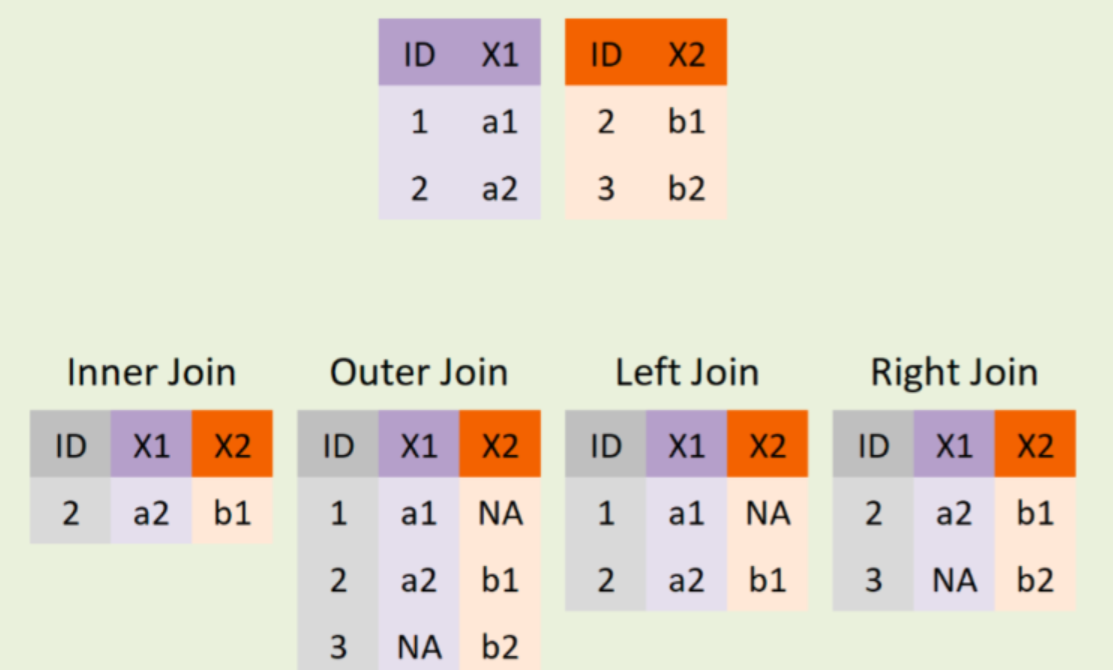
- pd.merge(df1, df2, how="join속성", on="key값 컬럼")
- 두개의 df에서 공통된 키값을 기준으로 병합
- 특징 
    - join의 속성
        - inner : 교집합(default)
        - outer : 합집합
        - left : 왼쪽 df값 기준으로 병합
        - right : 오른쪽 df값 기준으로 병합

In [ ]:
df5 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
 
df6 = pd.DataFrame({'key':['K0','K2','K3','K4'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [ ]:
# merge test
# 공통된 key 값을 기준으로 병합한다. => 교집합만 출력된다.
pd.merge(df5,df6)

# 공통의 기준은 on="key" 속성을 지정한다. default 값 how="inner" 속성을 지정하면 교집합만 출력된다. 
pd.merge(df5,df6, on="key")




In [ ]:
# 결측치도 나오게 만들 수 있다. 속성(Attributes, Properties) how="outer"를 지정한다. => 합집합
pd.merge(df5, df6, on="key", how="outer")


In [ ]:
# right join방식 : 오른쪽(df6)을 기준으로 모든 값을 결과에 포함시켜라
# 오른쪽을 기준으로 df6 기준으로 병합해라! hwo="right" 속성을 지정한다.

pd.merge(df5, df6, how = "right")

In [ ]:
#left join 왼쪽(df5)를 기준으로 모든 값을 결과에 포함시켜라
pd.merge(df5, df6, how="left")

# 병합예제1
-  2019,2020,2021.scv


In [ ]:
# operating system 운영체제 내에서 기본적으로 사용할 수 있는 함수가 포함되어있는 라이브러리.
import os


In [ ]:
# 현재위치 찾기 current working directory
os.getcwd()


In [ ]:
# 다른 디렉토리를 옮겨가고싶다.
os.chdir("./data")
# ★★★★★data에 위치한다면 data로 갈수 없기때문에 에러가 발생한다.★★★★★ 

# os.chdir("../")

In [ ]:
os.getcwd()  # 현재 디렉토리 확인

In [ ]:
## os.chdir("..")  # 상위 디렉토리로 이동


In [ ]:
## os.getcwd() # 현재 디렉토리 확인

In [ ]:
# 현재 내 작업기준 폴더의 list를 확인하고싶다.
os.listdir(os.getcwd())

# 본격적인 병합예제 1 
- 범죄데이터
- 2019,2020,2021.csv

# 인코딩 추론하기!
- character + detection library 


In [ ]:
# 인코딩 추론해야한다. 
# character + detection library
import chardet 

# with는 파일을 열어줬을때는 닫아줘야한다. 그런데 with  + as 쓰면 with 실행되면 굳이 닫아주지않고 넘어가도 된다 라는것.
# 개발자가 닫지 않아서 오류가나는 부분을 방지해준다.  
with open("./data/2019.csv", "rb") as f:
    data = f.read()

In [ ]:
chardet.detect(data)

In [ ]:
import pandas as pd
# 인코딩 => euc-kr ,encoding="euc-kr"
# 관서명으로 인덱스 지정하기 ,index_col="관서명"
data2019 = pd.read_csv("./data/2019.csv", index_col="관서명" ,encoding="euc-kr")
data2020 = pd.read_csv("./data/2020.csv", index_col="관서명" ,encoding="euc-kr")
data2021 = pd.read_csv("./data/2021.csv", index_col="관서명" ,encoding="euc-kr")


In [ ]:
# display함수를 이용한 출력으로 띄워주기
# print와 같은데 dataframe과 image를 보여줄때는 display함수를 사용한다. 
display(data2019, data2020, data2021)

In [ ]:
# data 결측치 확인하기 .info()
data2019.info()

In [ ]:
data2021

In [ ]:
# 광주지방경찰청에 해당하는 범죄수는 삭제하겠다.
# data2021.drop("광주지방경찰청")


In [ ]:
# 각각 데이터의 총합(column)등을 해본다 CRUD 
# 각각 데이터의 총합 구해서 컬럼에 추가하기

#indexer 사용한다. [ 행, 열] 

data2019["총합"] = data2019.iloc[:, 1:6].sum(axis=1)
data2020["총합"] = data2020.iloc[:, 1:6].sum(axis=1)
data2021["총합"] = data2021.iloc[:, 1:6].sum(axis=1)

data2019




In [ ]:
# 발생건수만 남겨서 temp2019, temp2020, temp2021 각각 담아보기
# 불리언boolena indexing 을 사용해서 

# "구분" 컬럼이 "발생건수"인 행만 남기기
temp2019 = data2019[data2019["구분"] == "발생건수"]
temp2020 = data2020[data2020["구분"] == "발생건수"]
temp2021 = data2021[data2021["구분"] == "발생건수"]

# 결과 확인
display(temp2019, temp2020, temp2021)
# print(temp2019, temp2020, temp2021)
# print(temp2019.shape, temp2020.shape, temp2021.shape)


In [ ]:
# 발생건수의 총합만 보여주기 => total2019, total2020, total2021 
# 각각의 데이터프레임에서 "총합" 컬럼만 선택하기
total2019 = temp2019["총합"]
total2020 = temp2020["총합"]
total2021 = temp2021["총합"]

# 결과 확인
display(total2019, total2020, total2021)

In [ ]:
# 증감율 구하기 => series 연산하기  

total2019=temp2019["총합"]
total2019.name = "2019총계"

total2020 = temp2020["총합"]
total2020.name = "2020총계"


total2021 = temp2021["총합"]
total2021.name = "2021총계"


display(total2019, total2020, total2021)

In [ ]:
# 증감율 = 변화량 / 원래데이터 
# (현재년도 - 이전년도) / 이전년도 * 100

plus2020 = (total2020 - total2019) / total2019 * 100
plus2020.name = "2019-2020 증감율"
plus2021 = (total2021 - total2020) / total2020 * 100
plus2021.name = "2020-2021 증감율"

display(plus2020, plus2021)

In [ ]:
# 병합하기 .concat
# pd.concat([시리즈1, 시리즈2, ...], axis=0) :


result = pd.concat([total2019,  plus2020, total2020, plus2021 , total2021], axis=1)
result

# 병합 예제2
- 월별급여
- 합쳐서 새로운 파일로 저장!


In [ ]:
import os

# ★★★★★ 현재의 위치를 확실히 확인해야한다. ★★★★★
os.getcwd()

In [ ]:

import chardet
with open("./data/월별급여/hr-pay-info-4월.csv", "rb") as f:
    data = f.read()
chardet.detect(data)

In [ ]:
# 현재 디렉토리의 파일 목록 확인하기
file_names = os.listdir("./data/월별급여")
# 데이터 넣어주기
pay_df_list = []

# 순회하면서 하나씩 가져올께
for fn in file_names : 
    df = pd.read_csv("./data/월별급여/" + fn, encoding="euc-kr")
    pay_df_list.append(df)

display(df)

In [ ]:
# 데이터 병합하기
total_df = pd.concat(pay_df_list)
total_df

In [ ]:
# CSV 파일로 저장하기!
total_df.to_csv("./data/월별급여/total_pay.csv", index=False, encoding="utf-8-sig")

### 병합예제 3
- raw data 2개를 병합하기.


In [ ]:
import pandas as pd
os.getcwd()

In [212]:
#조직 정보 데이터 읽어오기 (org-info) index_col="ORG_CD" organization  code 
org_info = pd.read_csv("./data/병합예제3/org-info.csv",index_col="ORG_CD", encoding="euc-kr")
org_info

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다."
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."


In [ ]:
# 직원 데이터 읽어오기 (hr-info) POS_CD = position code ? 
hr_info = pd.read_csv("./data/병합예제3/hr-info.csv", encoding="euc-kr")
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [ ]:
# 
hr_info["ORG_CD"][hr_info["ORG_CD"] == "ORG007"]

3      ORG007
35     ORG007
51     ORG007
54     ORG007
70     ORG007
97     ORG007
181    ORG007
Name: ORG_CD, dtype: object

In [210]:
# 직원이름 : ENAME, 나이:AGE, 근속연수: SERVICE_YEAR, 연봉: SALARY (.loc사용)
# hr_info.loc[: , ["ENAME", "AGE", "SERVICE_YEAR", "SALARY"]] 

## 직원이름 : ENAME, 나이:AGE, 근속연수: SERVICE_YEAR, 연봉: SALARY (groupby 사용)
#hr_info에서 ORG_CD라는 컬럼을 기준으로 그룹화 하겠다.
#집계함수 agg() => aggregation(집계)
#.agg({"ENAME": "first", "AGE": "mean", "SERVICE_YEAR": "mean", "SALARY": "sum"})
org_agg = hr_info.groupby("ORG_CD").agg({"ENAME" :"count", #직원의 이름수
                               "AGE" : "mean", #직원의 평균 나이
                               "SERVICE_YEAR": "mean", #직원의 평균 근속연수
                                "SALARY": "mean" #직원의 평균 연봉
                               })

In [211]:
org_agg

,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,
ORG001,6,26.166667,0.333333,5033.333333
ORG002,4,34.000000,7.500000,6550.000000
ORG003,5,34.600000,7.600000,6480.000000
ORG004,11,35.181818,7.000000,6445.454545
ORG005,8,29.250000,2.000000,5525.000000
ORG006,6,30.833333,4.166667,5966.666667
ORG007,7,36.714286,8.000000,6728.571429
ORG008,5,32.400000,5.200000,6020.000000
ORG009,5,29.800000,2.200000,5520.000000


In [ ]:
org_info_result = pd.concat([org_info, org_agg], axis=1)
org_info_result

org_info_result.to_csv("./data/병합예제3/org_info_result.csv", encoding="utf-8-sig")

AttributeError: 'DataFrame' object has no attribute 'to_scv'